## MutSpec over time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
path_all = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_normed_one.csv"
path_syn = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_SYN_normed_byone.csv"
path_ff = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_FF_normed_byone.csv"

In [3]:
colors = [
    "#f8766d",
    "#de8c00",
    "#b79f00",
    "#7cae00",
    "#00ba38",
    "#00c08b",
    "#00bfc4",
    "#00b4f0",
    "#619cff",
    "#c77cff",
    "#f564e3",
    "#ff64b0",
]
colors = list(map(str.upper, colors))[::-1]

In [7]:
def plot_time_mutspec(time_mutspec, outpath=None, label="", title=False):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    time_mutspec.index = time_mutspec.index.str.replace(
        "20(\d\d)-(\d\d)_-_20(\d\d)-(\d\d)", 
        lambda x: "{}/{}-{}/{}".format(*x.group(2,1,4,3))
    )
    time_mutspec.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor="white", linewidth=1.4, width=0.7)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Mutations', loc='upper left', bbox_to_anchor=(1.02,1))
    ax.set_xlabel("Time period")
    ax.set_ylabel("MutSpec")
    if title:
        ax.set_title("MutSpec by time, " + label);
    if outpath is not None:
        fig.savefig(outpath, bbox_inches="tight", pad_inches=.5)
    plt.show()

/tmp/ipykernel_7648/1881097924.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  time_mutspec.index = time_mutspec.index.str.replace(


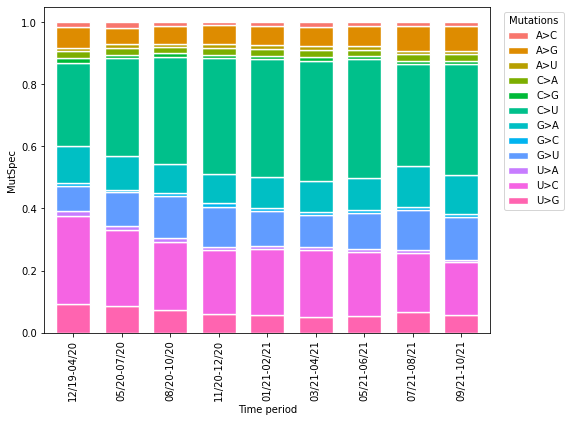

In [8]:
mutspec = pd.read_csv(path_all, index_col=0)
time_mutspec_all = mutspec.pivot("variable", "NucSubst", "value")
# time_mutspec = time_mutspec.iloc[:, np.argsort(time_mutspec.values[0])]

plot_time_mutspec(
    time_mutspec_all[time_mutspec_all.columns[::-1]], 
    "../figures/mutspec_by_time_all.pdf", 
    "all mut"
)

/tmp/ipykernel_7648/1881097924.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  time_mutspec.index = time_mutspec.index.str.replace(


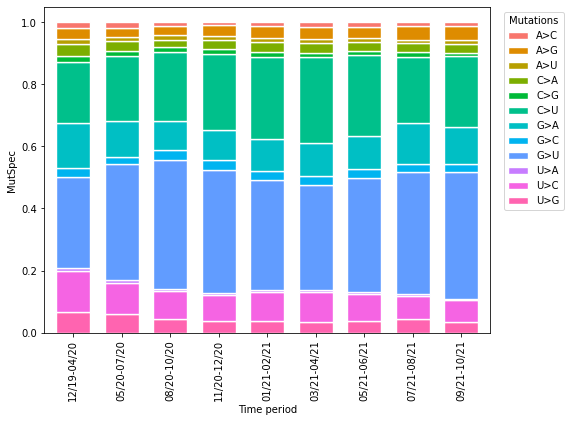

In [9]:
mutspec = pd.read_csv(path_syn, index_col=0)
time_mutspec_syn = mutspec.pivot("variable", "NucSubst", "value")
plot_time_mutspec(
    time_mutspec_syn[time_mutspec_syn.columns[::-1]], 
    "../figures/mutspec_by_time_syn.pdf", "syn"
)

/tmp/ipykernel_7648/1881097924.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  time_mutspec.index = time_mutspec.index.str.replace(


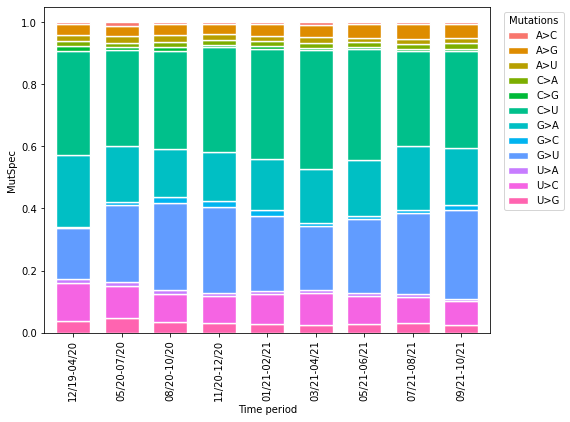

In [10]:
mutspec = pd.read_csv(path_ff, index_col=0)
time_mutspec_ff = mutspec.pivot("variable", "NucSubst", "value")
plot_time_mutspec(
    time_mutspec_ff[time_mutspec_ff.columns[::-1]], 
    "../figures/mutspec_by_time_ff.pdf", 
    "FF"
)

### Mut shares investigation

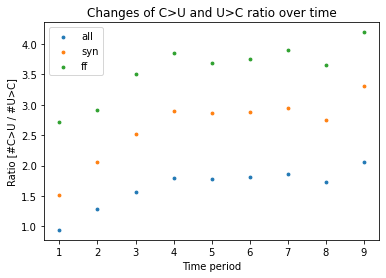

In [51]:
x = np.arange(1, time_mutspec_all.shape[0] + 1)
y1 = time_mutspec_all["C>U"] / time_mutspec_all["U>C"]
y2 = time_mutspec_syn["C>U"] / time_mutspec_syn["U>C"]
y3 = time_mutspec_ff["C>U"] / time_mutspec_ff["U>C"]

params = {"s": 8}
plt.scatter(x, y1, label="all", **params)
plt.scatter(x, y2, label="syn", **params)
plt.scatter(x, y3, label="ff", **params)
plt.title("Changes of C>U and U>C ratio over time")
plt.xlabel("Time period")
plt.ylabel("Ratio [#C>U / #U>C]")
plt.legend()
plt.savefig("../figures/CU_UC_ratio.svg")
plt.show()

### Linear regression reports

1. all mutations
2. synonymous
3. four-fold

In [52]:
X = sm.add_constant(x, prepend=False)

mod1 = sm.OLS(y1, X)
res1 = mod1.fit()

mod2 = sm.OLS(y2, X)
res2 = mod2.fit()

mod3 = sm.OLS(y3, X)
res3 = mod3.fit()

In [53]:
X

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [54]:
y1

variable
2019-12_-_2020-04    0.942451
2020-05_-_2020-07    1.279900
2020-08_-_2020-10    1.565394
2020-11_-_2020-12    1.801866
2021-01_-_2021-02    1.784518
2021-03_-_2021-04    1.811791
2021-05_-_2021-06    1.855886
2021-07_-_2021-08    1.727750
2021-09_-_2021-10    2.067210
dtype: float64

In [55]:
print(res1.summary())  # all

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     19.73
Date:                Wed, 26 Jan 2022   Prob (F-statistic):            0.00300
Time:                        14:58:22   Log-Likelihood:                 3.4511
No. Observations:                   9   AIC:                            -2.902
Df Residuals:                       7   BIC:                            -2.508
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1072      0.024      4.442      0.0

/home/kpotoh/sars-cov-2/env/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
print(res2.summary())  # syn

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     18.78
Date:                Wed, 26 Jan 2022   Prob (F-statistic):            0.00342
Time:                        14:58:22   Log-Likelihood:               -0.88865
No. Observations:                   9   AIC:                             5.777
Df Residuals:                       7   BIC:                             6.172
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1694      0.039      4.334      0.0

/home/kpotoh/sars-cov-2/env/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
print(res3.summary())  # ff

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     17.81
Date:                Wed, 26 Jan 2022   Prob (F-statistic):            0.00393
Time:                        14:58:22   Log-Likelihood:                0.19108
No. Observations:                   9   AIC:                             3.618
Df Residuals:                       7   BIC:                             4.012
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1464      0.035      4.221      0.0

/home/kpotoh/sars-cov-2/env/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


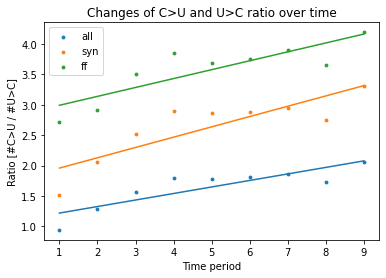

In [59]:
plt.scatter(x, y1, label="all", **params)
plt.scatter(x, y2, label="syn", **params)
plt.scatter(x, y3, label="ff", **params)

for r in [res1, res2, res3]:
    _y = np.dot(X, r.params)
    plt.plot(x, _y)

    # confint = r.conf_int()
    # y_lower = np.dot(X, confint[0])
    # y_upper = np.dot(X, confint[1])
    # plt.fill_between(x, y_lower, y_upper, alpha=0.2)

plt.title("Changes of C>U and U>C ratio over time")
plt.xlabel("Time period")
plt.ylabel("Ratio [#C>U / #U>C]")
plt.legend(loc="upper left")
plt.savefig("../figures/CU_UC_ratio.svg")
plt.show()